# Explore the forecast variable

## Introduction

In this notebook, I explore the forecast variable--weekly cases of dengue fever.  My focus is on descriptive statistics and on understanding the data's "story."

I look at this variable in each of my two samples--one from San Juan, Puerto Rico and the other from Iquitos, Peru.  I organize this notebook into two sections--one for each city.  

In each section, I examine:

* sample size, count, and variance of weekly cases,
* distribution of weekly cases and outliers, 
* weekly cases across all years,
* weekly cases by individual year, and
* weekly cases by across all months.

I've collected my commentary into a summary at the end of the notebook.

## Set up

In [1]:
# Eliminate some warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import key libraries and set some defaults

import numpy as np
import pandas as pd

# Import graphing libraries

import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec

import seaborn as sns

from pandas.plotting import lag_plot

# Need converters for matplotlib to use dates in time plot

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import some time series functions from stats models

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Import some other nifty libraries

from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
# Set some Seaborn defaults
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('muted')

## Load data

In [4]:
forc_sj = pd.read_pickle('../sb_cap2_nb-99_data/clean_train_forecast-variable_sj.pickle')
forc_iq = pd.read_pickle('../sb_cap2_nb-99_data/clean_train_forecast-variable_iq.pickle')

## Explore weekly cases in San Juan, Puerto Rico

In [5]:
# Set up the analysis of San Juan

df = forc_sj.copy()
CITY = 'San Juan'

### Explore count, variance and distribution of weekly cases  -  San Juan

In [6]:
# Calc basic descriptive stats for all columns

df.describe()

,year,month,weekofyear,total_cases
count,936.000000,936.000000,936.000000,936.000000
mean,1998.826923,6.418803,26.503205,34.180556
std,5.212076,3.452942,15.021909,51.381372
min,1990.000000,1.000000,1.000000,0.000000
25%,1994.000000,3.750000,13.750000,9.000000
50%,1999.000000,6.500000,26.500000,19.000000
75%,2003.000000,9.000000,39.250000,37.000000
max,2008.000000,12.000000,53.000000,461.000000


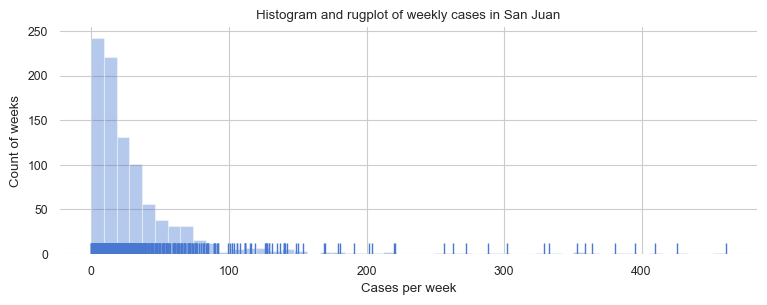

In [7]:
# Graph the distribution of weekly cases

g = plt.figure(figsize=(9, 3), dpi=100)
g = sns.distplot(df['total_cases'], kde=False, rug=True)
g = plt.xlabel('Cases per week')
g = plt.ylabel('Count of weeks')
g = plt.title('Histogram and rugplot of weekly cases in {}'.format(CITY))
g = plt.box(on=None)

In [8]:
def graph_cdf(x, city):
    """Graph a Cumulative Distribution Function (CDF)"""
    g = plt.figure(figsize=(9, 3), dpi=100)
    g = plt.hist(x, bins=100, cumulative=True, density=True, histtype='step')
    g = plt.xlabel('Probabilty')
    g = plt.ylabel('Count of weeks')
    g = plt.title('CDF of weekly cases in {}'.format(CITY))
    g = plt.box(on=None)

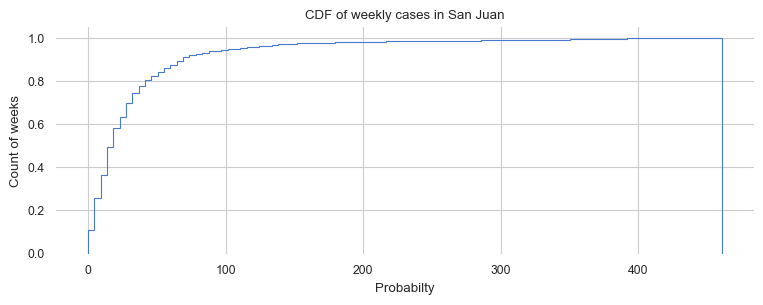

In [9]:
graph_cdf(df['total_cases'], 'San Juan')

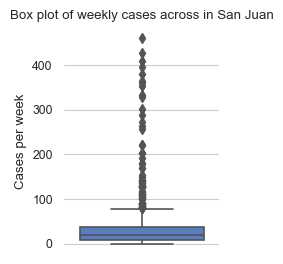

In [10]:
# Graph a box plot of weekly cases

g = plt.figure(figsize=(2, 3), dpi=100)
g = sns.boxplot(data=df, y='total_cases')
g = plt.ylabel('Cases per week')
g = plt.title('Box plot of weekly cases across in {}'.format(CITY))
g = plt.box(on=None)

### Explore the distribution of log(x+1) of weekly cases  -  San Juan

In [11]:
# Calc the log(x+1) of weekly cases

df_log = df.copy()
df_log['total_cases_log1p'] = np.log1p(df['total_cases'])

# Note:  Using log(x+1) to accomodate the frequent zero values

# # Check
# df_log.head()

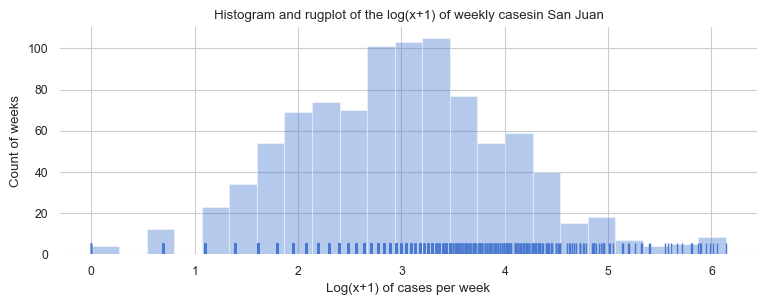

In [12]:
# Graph the distribution of the log(x+1) of weekly cases

g = plt.figure(figsize=(9, 3), dpi=100)
g = sns.distplot(df_log['total_cases_log1p'], kde=False, rug=True)
g = plt.xlabel('Log(x+1) of cases per week')
g = plt.ylabel('Count of weeks')
g = plt.title('Histogram and rugplot of the log(x+1) of weekly casesin {}'.format(CITY))
g = plt.box(on=None)

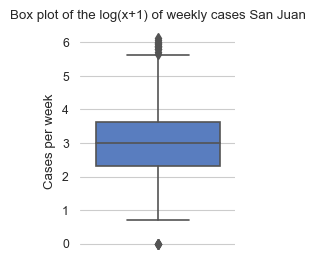

In [13]:
# Graph a box plot of the log(x+1) of weekly cases

g = plt.figure(figsize=(2, 3), dpi=100)
g = sns.boxplot(data=df_log, y='total_cases_log1p')
g = plt.ylabel('Cases per week')
g = plt.title('Box plot of the log(x+1) of weekly cases {}'.format(CITY))
g = plt.box(on=None)

### Explore the distribution of the difference in weekly cases  -  San Juan

In [14]:
# Calc the difference in weekly cases at 1-lag

df_diff = df.copy()
df_diff['total_cases_diff'] = df_diff['total_cases'].diff(periods=1)

# Drop the first row as it is NaN
df_diff.drop(df.index[0], inplace=True)

# # Check
# df_diff.head()

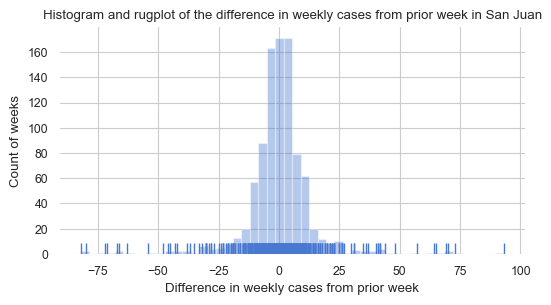

In [15]:
# Graph the distribution of the difference in weekly cases at 1-lag

g = plt.figure(figsize=(6, 3), dpi=100)
g = sns.distplot(df_diff['total_cases_diff'], kde=False, rug=True)
g = plt.xlabel('Difference in weekly cases from prior week')
g = plt.ylabel('Count of weeks')
g = plt.title('Histogram and rugplot of the difference in weekly cases from prior week in {}'.format(CITY))
g = plt.box(on=None)

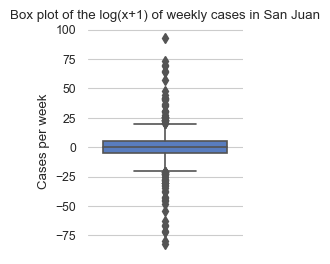

In [16]:
# Graph a box plot of the log(x+1) of weekly cases

g = plt.figure(figsize=(2, 3), dpi=100)
g = sns.boxplot(data=df_diff, y='total_cases_diff')
g = plt.ylabel('Cases per week')
g = plt.title('Box plot of the log(x+1) of weekly cases in {}'.format(CITY))
g = plt.box(on=None)

### Explore weekly cases across all years  -  San Juan

In [17]:
# Reindex the dataframe
# NOTE:  Seaborn has a problem if you try to use the index as X

df_temp = df.copy()
df_temp.reset_index(inplace=True)

# # Check
# df_temp.describe()
# df_temp.head()

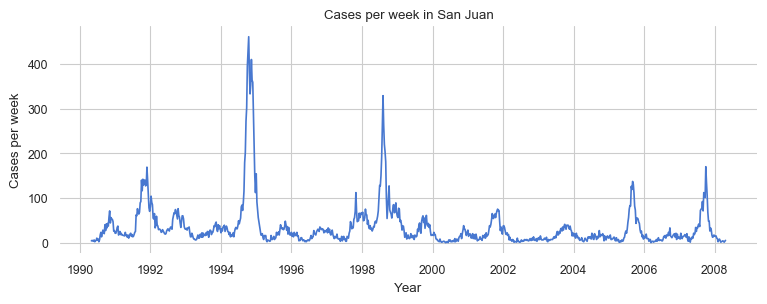

In [18]:
# Graph cases across all years

g = plt.figure(figsize=(9, 3), dpi=100)
g = sns.lineplot(data=df_temp, x='week_start_date', y='total_cases')
g = plt.xlabel('Year')
g = plt.ylabel('Cases per week')
g = plt.title('Cases per week in {}'.format(CITY))
g = plt.box(on=None)

In [19]:
# Calc rolling average of weekly cases at various windows

df_temp['2_wk'] = df_temp['total_cases'].rolling(window=2, center=False).mean()
df_temp['4_wk'] = df_temp['total_cases'].rolling(window=4, center=False).mean()
df_temp['8_wk'] = df_temp['total_cases'].rolling(window=8, center=False).mean()
df_temp['12_wk'] = df_temp['total_cases'].rolling(window=12, center=False).mean()
df_temp['26_wk'] = df_temp['total_cases'].rolling(window=12, center=False).mean()
df_temp['52_wk'] = df_temp['total_cases'].rolling(window=12, center=False).mean()

# # Check 
# df_temp

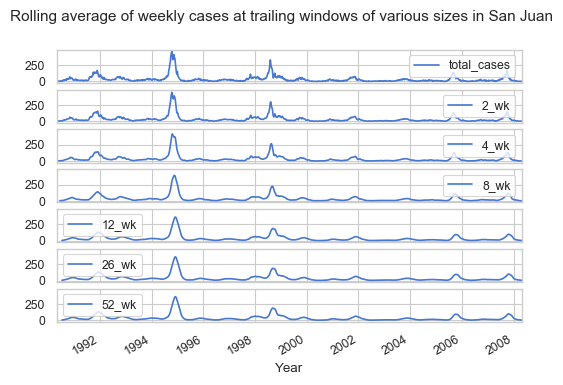

In [20]:
# Graph rolling averages of weekly cases

fig, axes = plt.subplots(7,1, sharex=True, sharey=True, dpi=100)
g = df_temp.plot(x='week_start_date', y='total_cases', ax=axes[0])
g = df_temp.plot(x='week_start_date', y='2_wk', ax=axes[1])
g = df_temp.plot(x='week_start_date', y='4_wk', ax=axes[2])
g = df_temp.plot(x='week_start_date', y='8_wk', ax=axes[3])
g = df_temp.plot(x='week_start_date', y='12_wk', ax=axes[4])
g = df_temp.plot(x='week_start_date', y='26_wk', ax=axes[5])
g = df_temp.plot(x='week_start_date', y='52_wk', ax=axes[6])
g = fig.suptitle('Rolling average of weekly cases at trailing windows of various sizes in {}'.format(CITY), fontsize=11)
g = plt.xlabel('Year')

### Explore weekly cases by individual years  -  San Juan

In [21]:
# Calc basic descriptive stats of weekly cases for individual years

df_yearly = df.copy().pivot(columns='year', values='total_cases')
df_yearly.describe()

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
count,35.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,17.000000
mean,24.742857,53.865385,45.596154,22.230769,125.634615,25.634615,16.442308,27.961538,88.365385,31.403846,9.461538,28.134615,8.692308,18.250000,11.730769,34.711538,10.576923,37.865385,6.235294
std,19.581418,47.929699,20.611495,10.222266,140.954593,25.213620,9.710341,23.092280,66.697452,18.431920,9.348297,21.856958,8.826294,12.051971,5.481217,38.011008,6.797768,38.023743,4.802726
min,2.000000,10.000000,19.000000,6.000000,13.000000,2.000000,2.000000,3.000000,26.000000,7.000000,0.000000,4.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000
25%,6.000000,17.000000,29.000000,13.000000,25.750000,10.750000,6.000000,10.000000,48.750000,15.000000,2.000000,11.000000,3.000000,7.000000,7.000000,7.000000,5.000000,12.750000,3.000000
50%,23.000000,24.000000,37.500000,22.000000,40.500000,18.000000,16.000000,20.500000,67.000000,27.500000,6.000000,18.500000,6.000000,14.500000,12.000000,17.000000,10.000000,21.000000,5.000000
75%,41.000000,80.750000,60.000000,30.000000,206.750000,33.000000,24.250000,43.250000,99.750000,44.250000,16.000000,42.500000,9.250000,29.250000,15.000000,53.500000,15.250000,48.000000,9.000000
max,71.000000,169.000000,104.000000,46.000000,461.000000,154.000000,35.000000,112.000000,329.000000,77.000000,38.000000,75.000000,38.000000,41.000000,27.000000,137.000000,33.000000,170.000000,15.000000


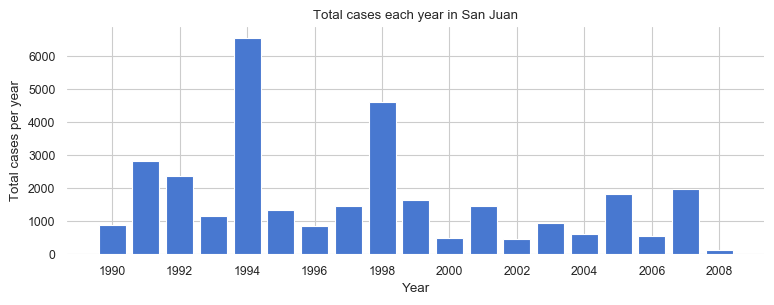

In [22]:
# Graph barplot of total cases by year

df_yearly_sum = pd.DataFrame(df_yearly.sum())
df_yearly_sum.reset_index(inplace=True)

g = plt.figure(figsize=(9, 3), dpi=100)
g = plt.bar(df_yearly_sum.iloc[:, 0], df_yearly_sum.iloc[:, 1], align='center')
g = plt.xlabel('Year')
g = plt.ylabel('Total cases per year')
g = plt.title('Total cases each year in {}'.format(CITY))
g = plt.xticks(np.arange(min(df_yearly_sum.iloc[:, 0]), max(df_yearly_sum.iloc[:, 0])+1, 2))
g = plt.box(on=None)

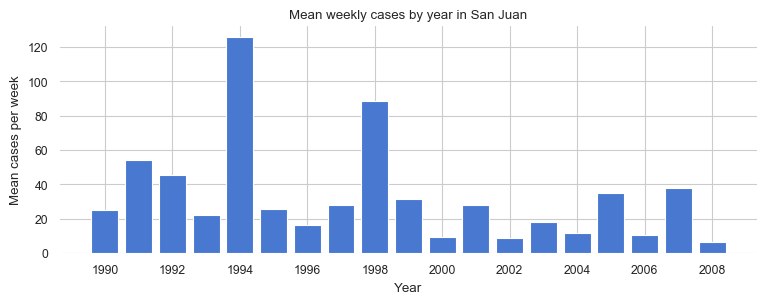

In [23]:
# Graph barplot of average cases per year

df_yearly_mean = pd.DataFrame(df_yearly.mean())
df_yearly_mean.reset_index(inplace=True)

g = plt.figure(figsize=(9, 3), dpi=100)
g = plt.bar(df_yearly_mean.iloc[:, 0], df_yearly_mean.iloc[:, 1], align='center')
g = plt.xlabel('Year')
g = plt.ylabel('Mean cases per week')
g = plt.title('Mean weekly cases by year in {}'.format(CITY))
g = plt.xticks(np.arange(min(df_yearly_mean.iloc[:, 0]), max(df_yearly_mean.iloc[:, 0])+1, 2))
g = plt.box(on=None)

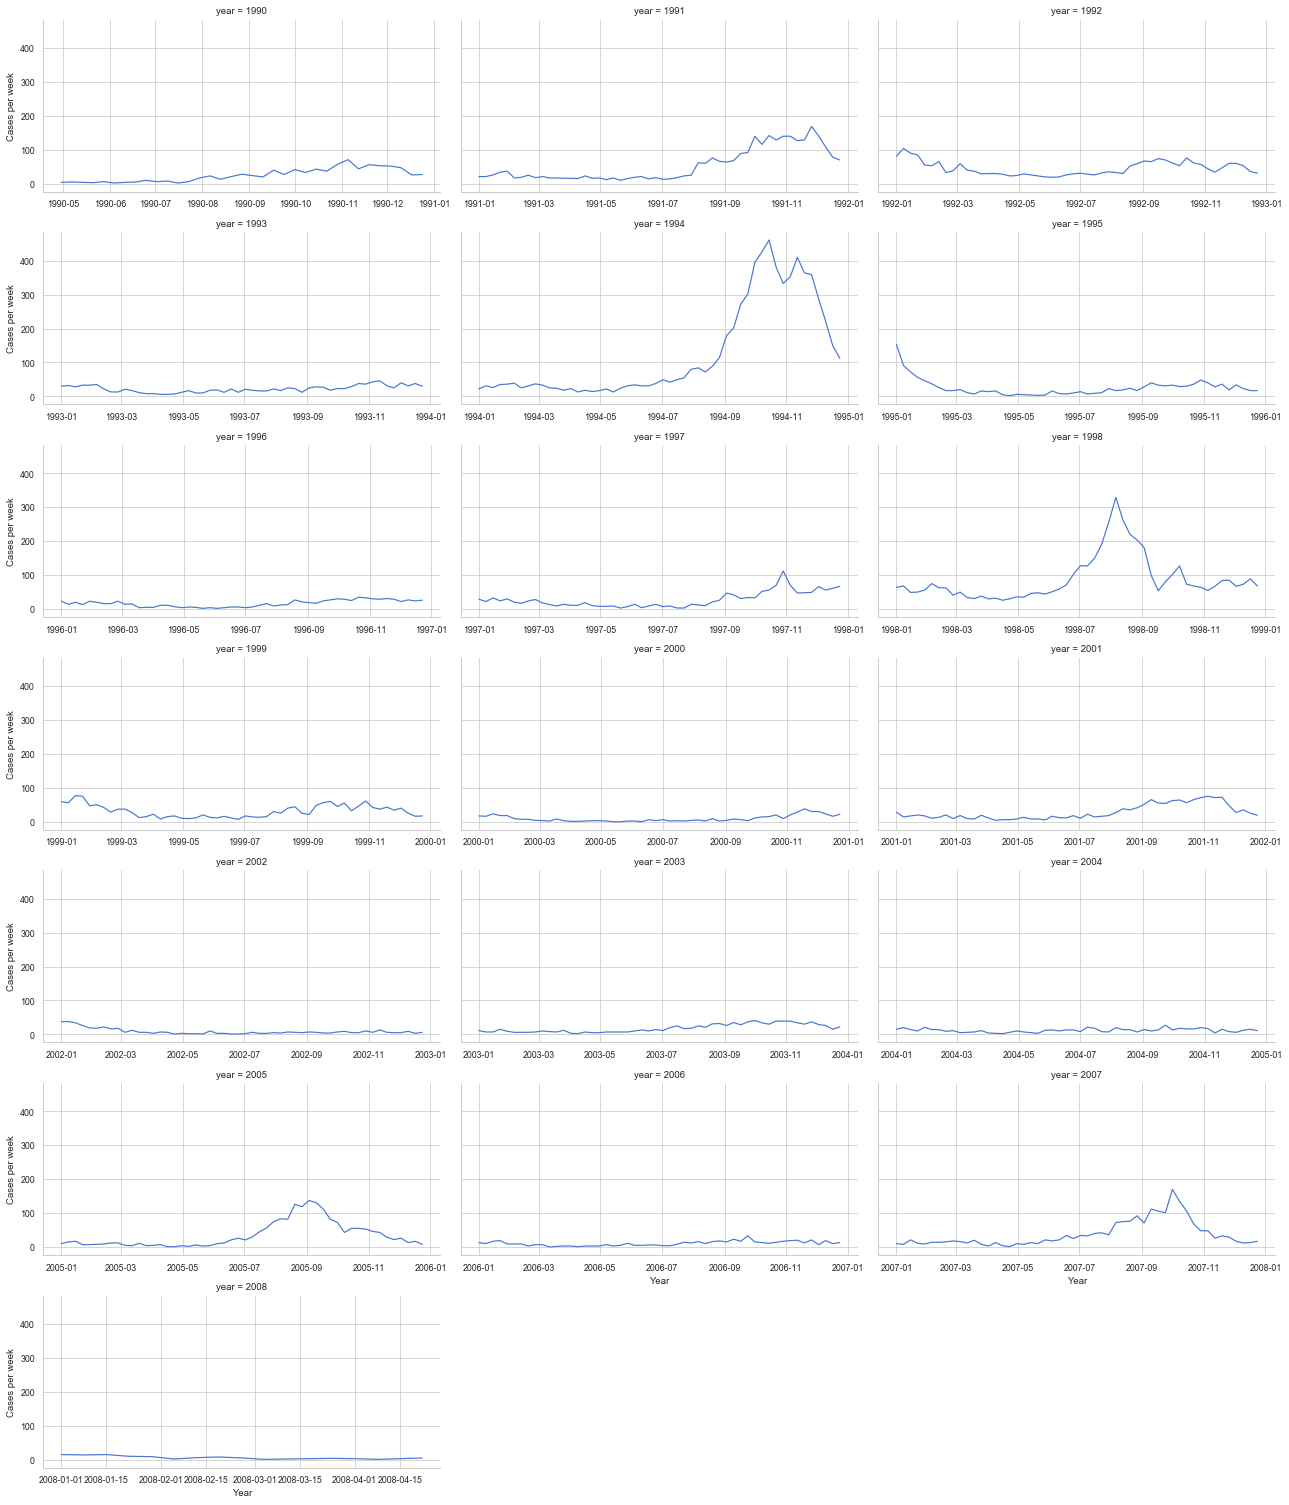

In [24]:
# Graph a grid chart of cases for each year

g = sns.FacetGrid(data = df_temp, col='year', col_wrap=3, sharex=False, aspect=2)
g = g.map(sns.lineplot, 'week_start_date', 'total_cases')
g = g.set_axis_labels('Year', 'Cases per week')

# Fiddling with formatting didn't seem to work too week with FacetGrid
# For example, rotating xticks threw off xlabels

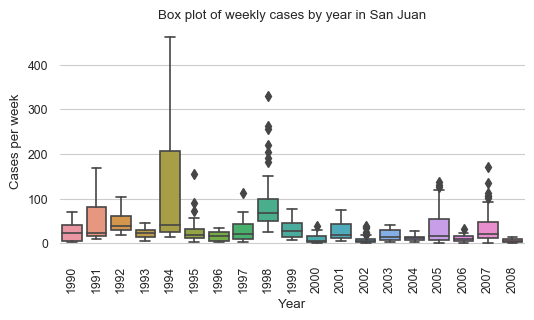

In [25]:
# Graph box plot of cases by year

g = plt.figure(figsize=(6, 3), dpi=100)
g = sns.boxplot(data=df, y='total_cases', x='year')
g = plt.xlabel('Year')
g = plt.ylabel('Cases per week')
g = plt.title('Box plot of weekly cases by year in {}'.format(CITY))
g = plt.xticks(rotation=90)
g = plt.box(on=None)

### Explore weekly cases across all months -  San Juan

In [26]:
# Calc basic descriptive stats of cases by month

month_names_long = ['January', 'February', 'March', 
               'April', 'May', 'June', 
               'July', 'August', 'September', 
               'October', 'November', 'December']

month_names_short = ['Jan', 'Feb', 'Mar', 
               'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 
               'Oct', 'Nov', 'Dec']

df_monthly = df.copy().pivot(columns='month', values='total_cases')
df_monthly.columns = month_names_short

df_monthly.describe()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,90.000000,72.000000,72.000000,90.000000,72.000000,72.000000,90.000000,72.000000,76.000000,86.000000,72.000000,72.000000
mean,31.422222,21.097222,14.597222,10.022222,11.138889,16.319444,27.355556,48.041667,55.750000,71.000000,61.819444,41.680556
std,25.894764,15.965773,12.003121,8.725499,10.592723,16.557052,39.896583,59.562593,57.171117,90.128144,81.664261,47.502061
min,7.000000,2.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,5.000000,4.000000,3.000000
25%,15.000000,9.000000,6.000000,3.000000,4.000000,6.000000,8.000000,15.500000,20.750000,29.000000,28.000000,16.750000
50%,22.000000,17.000000,11.500000,7.000000,7.500000,12.000000,16.000000,25.000000,34.500000,44.000000,38.500000,26.000000
75%,36.750000,26.500000,18.250000,14.750000,13.000000,19.250000,29.500000,63.000000,68.500000,68.000000,55.250000,52.250000
max,154.000000,75.000000,59.000000,36.000000,48.000000,102.000000,256.000000,329.000000,302.000000,461.000000,410.000000,288.000000


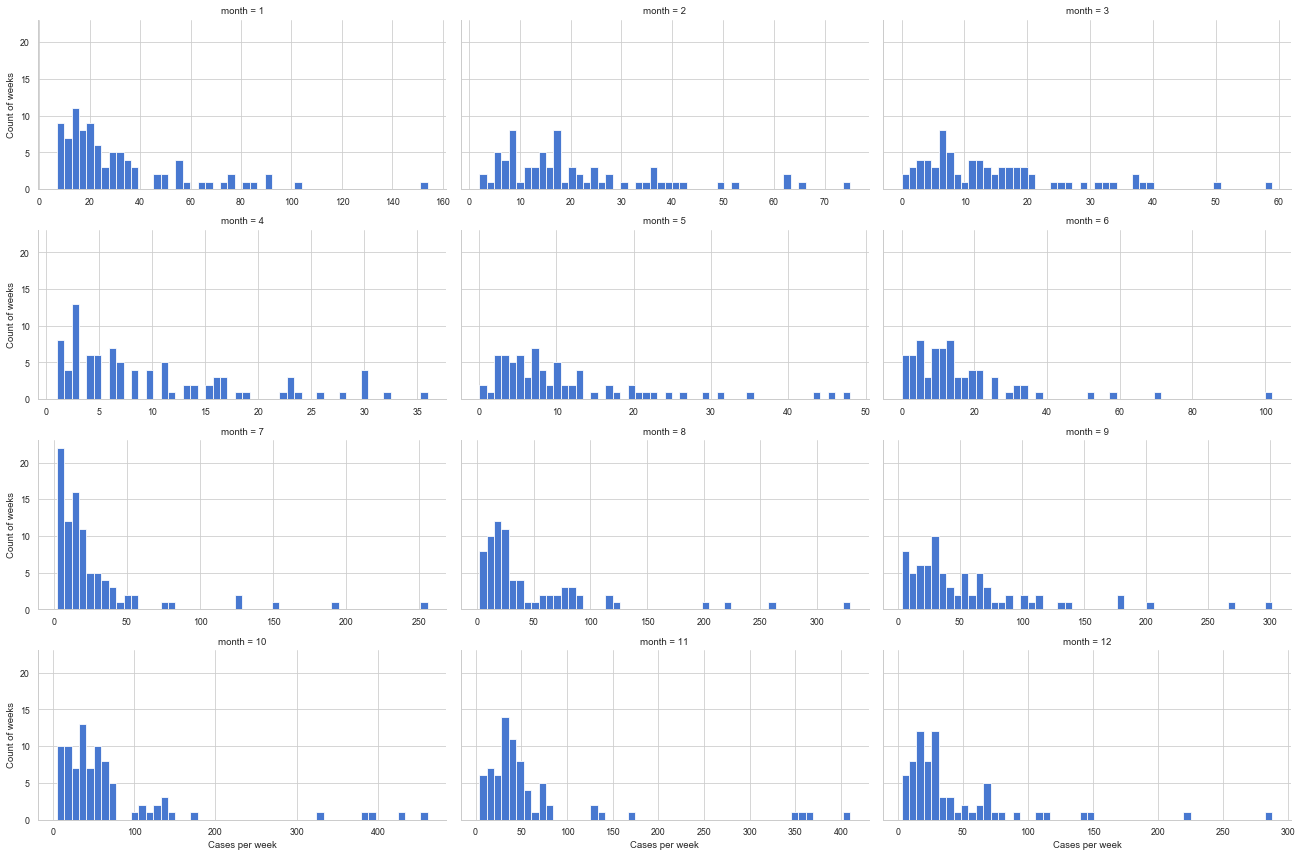

In [27]:
# Graph a grid chart of histograms for cases by month

g = sns.FacetGrid(data = df_temp, col='month', col_wrap=3, sharex=False, aspect=2)
g = g.map(plt.hist, 'total_cases', bins=50)
g = g.set_axis_labels('Cases per week', 'Count of weeks')

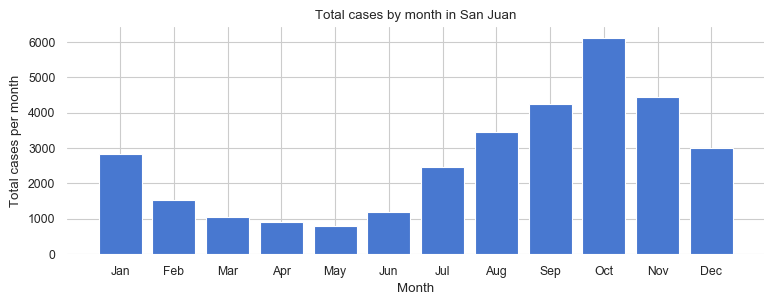

In [28]:
# Graph barplot of total monthly cases

df_monthly_sum = pd.DataFrame(df_monthly.sum())
df_monthly_sum.reset_index(inplace=True)

g = plt.figure(figsize=(9, 3), dpi=100)
g = plt.bar(df_monthly_sum.iloc[:, 0], df_monthly_sum.iloc[:, 1], align='center')
g = plt.xlabel('Month')
g = plt.ylabel('Total cases per month')
g = plt.title('Total cases by month in {}'.format(CITY))
g = plt.box(on=None)

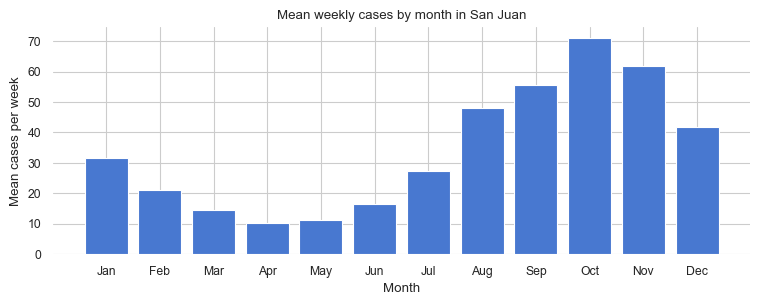

In [29]:
# Graph barplot of average cases by month

df_monthly_mean = pd.DataFrame(df_monthly.mean())
df_monthly_mean.reset_index(inplace=True)

g = plt.figure(figsize=(9, 3), dpi=100)
g = plt.bar(df_monthly_mean.iloc[:, 0], df_monthly_mean.iloc[:, 1], align='center')
g = plt.xlabel('Month')
g = plt.ylabel('Mean cases per week')
g = plt.title('Mean weekly cases by month in {}'.format(CITY))
g = plt.box(on=None)

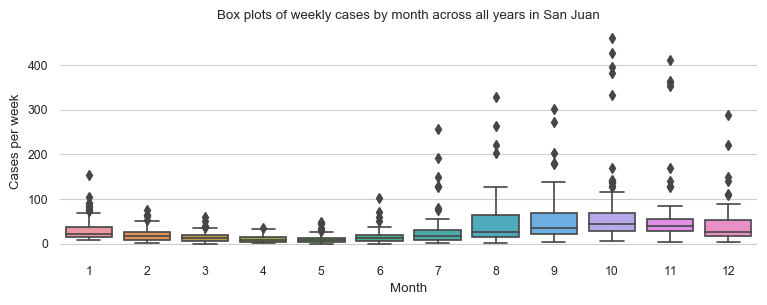

In [30]:
# Graph box plot of weekly cases across months

g = plt.figure(figsize=(9, 3), dpi=100)
g = sns.boxplot(data=df, y='total_cases', x='month')
g = plt.xlabel('Month')
g = plt.ylabel('Cases per week')
g = plt.title('Box plots of weekly cases by month across all years in {}'.format(CITY))
g = plt.box(on=None)

### Decompose weekly cases into trend, seasonality and residual  -  San Juan

In [31]:
# Drop columns that aren't neeeded

df_decomp = df.drop(['year', 'month', 'weekofyear'], axis=1)

# # Check
# df_decomp
# df_decomp.info()

Decomposition of weekly cases into trend, seasonality and residual via a naive, additive model in San Juan


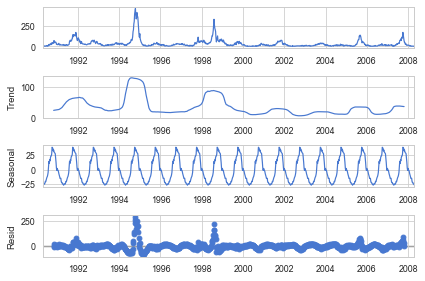

In [32]:
# Calc via statsmodels tsa's seasonal_decompose()

print('Decomposition of weekly cases into trend, seasonality and residual via a naive, additive model in {}'.format(CITY))
decompose = seasonal_decompose(df_decomp, model='additive', freq=52)
g = decompose.plot()
g = plt.show()

# Note:  When I try a multiplicative model, I get the following:
# ValueError: Multiplicative seasonality is not appropriate for zero and negative values

## Explore cases in Iquitos, Peru

In [33]:
# Set up analysis for Iquitos

df = forc_iq.copy()
CITY = 'Iquitos'

### Count, variance and distribution of weekly cases  -  Iquitos

In [34]:
# Count of cases per week

df['total_cases'].describe()

count    520.000000
mean       7.565385
std       10.765478
min        0.000000
25%        1.000000
50%        5.000000
75%        9.000000
max      116.000000
Name: total_cases, dtype: float64

In [35]:
# Calc basic descriptive stats for all columns

df.describe()

,year,month,weekofyear,total_cases
count,520.000000,520.000000,520.000000,520.000000
mean,2005.000000,6.417308,26.503846,7.565385
std,2.918283,3.453083,15.029450,10.765478
min,2000.000000,1.000000,1.000000,0.000000
25%,2002.750000,3.750000,13.750000,1.000000
50%,2005.000000,6.500000,26.500000,5.000000
75%,2007.250000,9.000000,39.250000,9.000000
max,2010.000000,12.000000,53.000000,116.000000


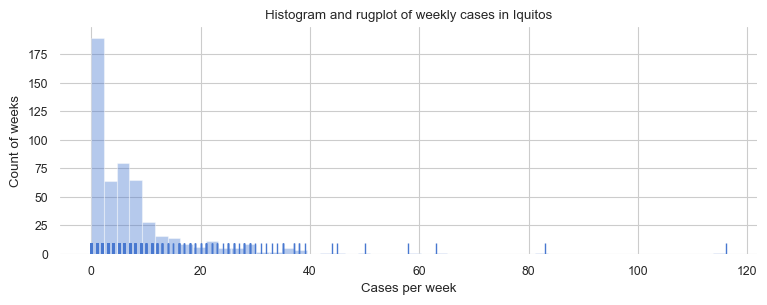

In [36]:
# Graph the distribution of weekly cases

g = plt.figure(figsize=(9, 3), dpi=100)
g = sns.distplot(df['total_cases'], kde=False, rug=True)
g = plt.xlabel('Cases per week')
g = plt.ylabel('Count of weeks')
g = plt.title('Histogram and rugplot of weekly cases in {}'.format(CITY))
g = plt.box(on=None)

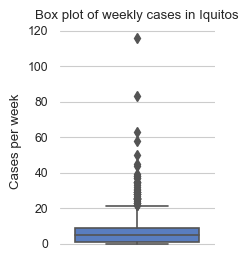

In [37]:
# Box plot of weekly cases

g = plt.figure(figsize=(2, 3), dpi=100)
g = sns.boxplot(data=df, y='total_cases')
g = plt.ylabel('Cases per week')
g = plt.title('Box plot of weekly cases in {}'.format(CITY))
g = plt.box(on=None)

### Distribution of the log(x+1) of weekly cases  -  Iquitos

In [38]:
# Calc the log(x+1) of weekly cases

df_log = df.copy()
df_log['total_cases_log1p'] = np.log1p(df['total_cases'])

# Note:  Using log(x+1) to accomodate all the zero values

# # Check
# df_log.head()

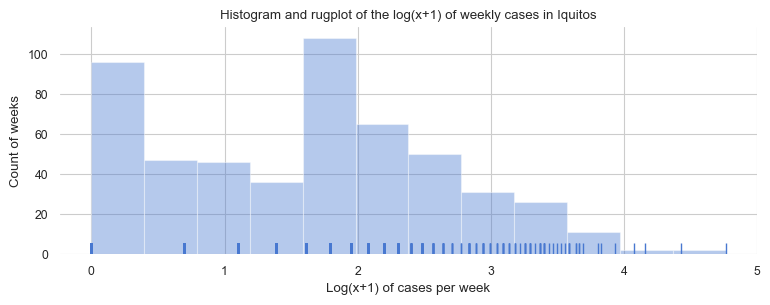

In [39]:
# Graph the distribution of the log(x+1) of weekly cases

g = plt.figure(figsize=(9, 3), dpi=100)
g = sns.distplot(df_log['total_cases_log1p'], kde=False, rug=True)
g = plt.xlabel('Log(x+1) of cases per week')
g = plt.ylabel('Count of weeks')
g = plt.title('Histogram and rugplot of the log(x+1) of weekly cases in {}'.format(CITY))
g = plt.box(on=None)

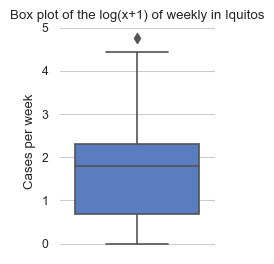

In [40]:
# Box plot of weekly cases

g = plt.figure(figsize=(2, 3), dpi=100)
g = sns.boxplot(data=df_log, y='total_cases_log1p')
g = plt.ylabel('Cases per week')
g = plt.title('Box plot of the log(x+1) of weekly in {}'.format(CITY))
g = plt.box(on=None)

### Distribution of the difference of weekly cases - Iquitos

In [41]:
# Calc the difference in weekly cases at 1-lag

df_diff = df.copy()
df_diff['total_cases_diff'] = df_diff['total_cases'].diff(periods=1)

# Drop the first row as it is NaN
df_diff.drop(df.index[0], inplace=True)

# # Check
# df_diff.head()

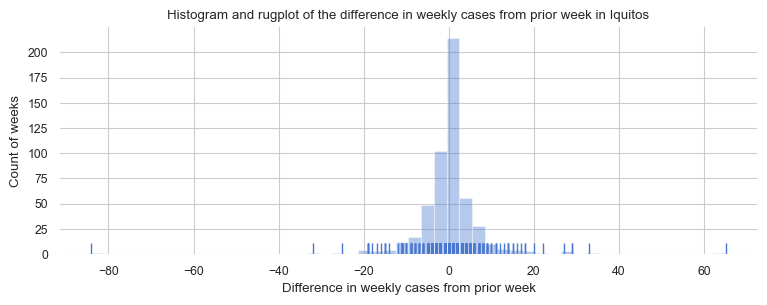

In [42]:
# Graph the distribution of the difference in weekly cases at 1-lag

g = plt.figure(figsize=(9, 3), dpi=100)
g = sns.distplot(df_diff['total_cases_diff'], kde=False, rug=True)
g = plt.xlabel('Difference in weekly cases from prior week')
g = plt.ylabel('Count of weeks')
g = plt.title('Histogram and rugplot of the difference in weekly cases from prior week in {}'.format(CITY))
g = plt.box(on=None)

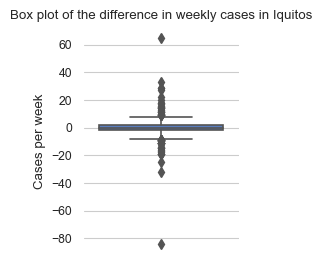

In [43]:
# Box plot of weekly cases

g = plt.figure(figsize=(2, 3), dpi=100)
g = sns.boxplot(data=df_diff, y='total_cases_diff')
g = plt.ylabel('Cases per week')
g = plt.title('Box plot of the difference in weekly cases in {}'.format(CITY))
g = plt.box(on=None)

### Explore weekly cases across all years  -  Iquitos

In [44]:
# Reindex dataframe

df_temp = df.copy()
df_temp.reset_index(inplace=True)

# # Check
# df_temp.describe()
# df_temp.head()

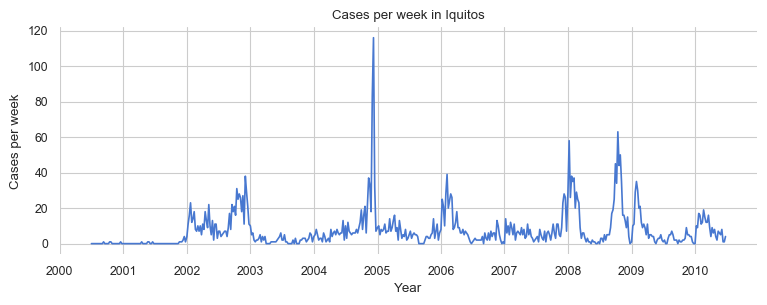

In [45]:
# Graph cases across all years

g = plt.figure(figsize=(9, 3), dpi=100)
g = sns.lineplot(data=df_temp, x='week_start_date', y='total_cases')
g = plt.xlabel('Year')
g = plt.ylabel('Cases per week')
g = plt.title('Cases per week in {}'.format(CITY))
g = plt.box(on=None)

In [46]:
# Calc rolling average of weekly cases at various windows

df_temp['2_wk'] = df_temp['total_cases'].rolling(window=2, center=False).mean()
df_temp['4_wk'] = df_temp['total_cases'].rolling(window=4, center=False).mean()
df_temp['8_wk'] = df_temp['total_cases'].rolling(window=8, center=False).mean()
df_temp['12_wk'] = df_temp['total_cases'].rolling(window=12, center=False).mean()
df_temp['26_wk'] = df_temp['total_cases'].rolling(window=12, center=False).mean()
df_temp['52_wk'] = df_temp['total_cases'].rolling(window=12, center=False).mean()

# # Check 
# df_temp

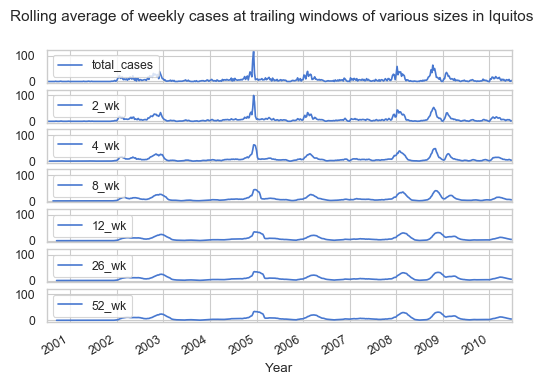

In [47]:
# Graph rolling averages of weekly cases

fig, axes = plt.subplots(7,1, sharex=True, sharey=True, dpi=100)
g = df_temp.plot(x='week_start_date', y='total_cases', ax=axes[0])
g = df_temp.plot(x='week_start_date', y='2_wk', ax=axes[1])
g = df_temp.plot(x='week_start_date', y='4_wk', ax=axes[2])
g = df_temp.plot(x='week_start_date', y='8_wk', ax=axes[3])
g = df_temp.plot(x='week_start_date', y='12_wk', ax=axes[4])
g = df_temp.plot(x='week_start_date', y='26_wk', ax=axes[5])
g = df_temp.plot(x='week_start_date', y='52_wk', ax=axes[6])
g = fig.suptitle('Rolling average of weekly cases at trailing windows of various sizes in {}'.format(CITY), fontsize=11)
g = plt.xlabel('Year')

### Explore weekly cases by individual years  -  Iquitos

In [48]:
# Calc basic descriptive stats of weekly cases for individual years

df_yearly = df.copy().pivot(columns='year', values='total_cases')
df_yearly.describe()

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
count,26.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,26.000000
mean,0.153846,0.269231,13.538462,2.192308,12.269231,5.980769,8.384615,7.019231,15.403846,6.230769,8.576923
std,0.367946,0.689285,8.318327,2.096107,19.599035,3.867869,8.800967,5.682758,16.837469,7.750055,5.285248
min,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.000000,1.000000,4.750000,3.000000,2.000000,3.750000,2.000000,2.000000,4.250000
50%,0.000000,0.000000,11.000000,2.000000,6.000000,5.500000,6.000000,6.000000,7.500000,4.000000,8.500000
75%,0.000000,0.000000,18.000000,3.000000,10.500000,8.000000,9.250000,9.000000,25.250000,7.500000,12.000000
max,1.000000,4.000000,38.000000,10.000000,116.000000,16.000000,39.000000,28.000000,63.000000,35.000000,19.000000


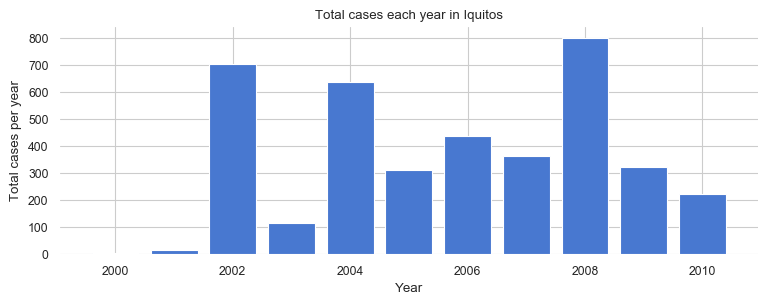

In [49]:
# Graph barplot of total cases by year

df_yearly_sum = pd.DataFrame(df_yearly.sum())
df_yearly_sum.reset_index(inplace=True)

g = plt.figure(figsize=(9, 3), dpi=100)
g = plt.bar(df_yearly_sum.iloc[:, 0], df_yearly_sum.iloc[:, 1], align='center')
g = plt.xlabel('Year')
g = plt.ylabel('Total cases per year')
g = plt.title('Total cases each year in {}'.format(CITY))
g = plt.xticks(np.arange(min(df_yearly_sum.iloc[:, 0]), max(df_yearly_sum.iloc[:, 0])+1, 2))
g = plt.box(on=None)

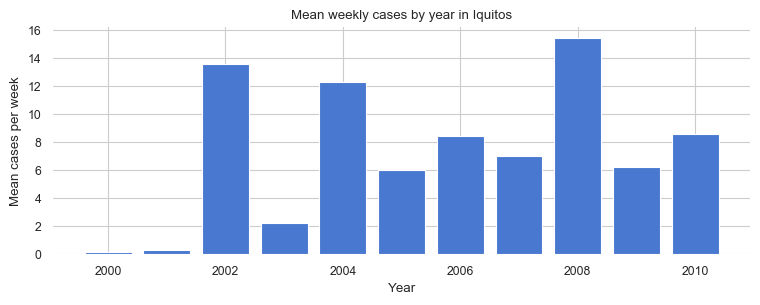

In [50]:
# Graph barplot of average cases per year

df_yearly_mean = pd.DataFrame(df_yearly.mean())
df_yearly_mean.reset_index(inplace=True)

g = plt.figure(figsize=(9, 3), dpi=100)
g = plt.bar(df_yearly_mean.iloc[:, 0], df_yearly_mean.iloc[:, 1], align='center')
g = plt.xlabel('Year')
g = plt.ylabel('Mean cases per week')
g = plt.title('Mean weekly cases by year in {}'.format(CITY))
g = plt.xticks(np.arange(min(df_yearly_mean.iloc[:, 0]), max(df_yearly_mean.iloc[:, 0])+1, 2))
g = plt.box(on=None)

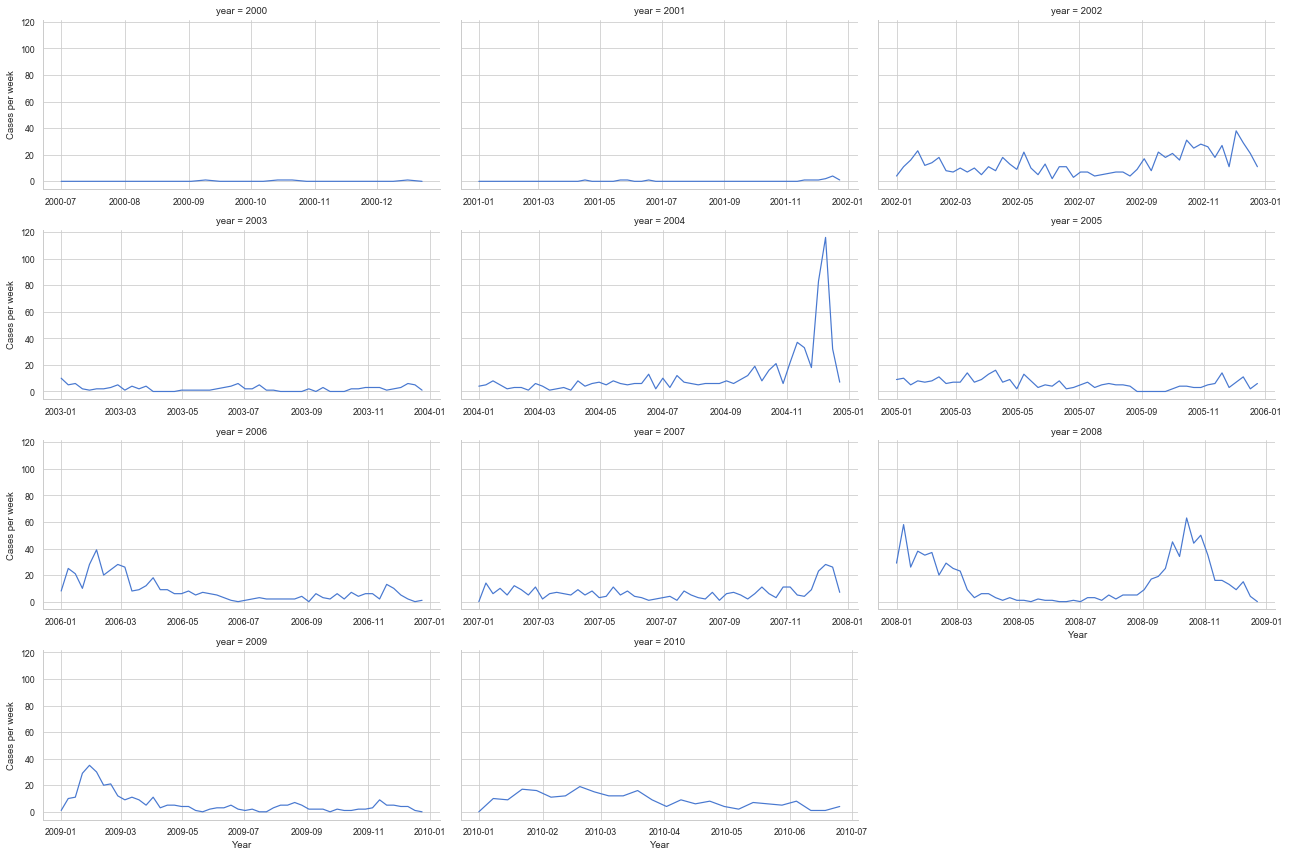

In [51]:
# Graph weekly cases by year

g = sns.FacetGrid(data = df_temp, col='year', col_wrap=3, sharex=False, aspect=2)
g = g.map(sns.lineplot, 'week_start_date', 'total_cases')
g = g.set_axis_labels('Year', 'Cases per week')

# NOTE:  Fiddling with formatting didn't seem to work.  That is, FacetGrid seems quirky
# g = g.fig.subplots_adjust(wspace=.25, hspace=.5)
# g.set_xticklabels(rotation=30)
# Rotating xticklabels throws off the labels within each facet
# g = plt.title('Cases per week in San Juan by year')

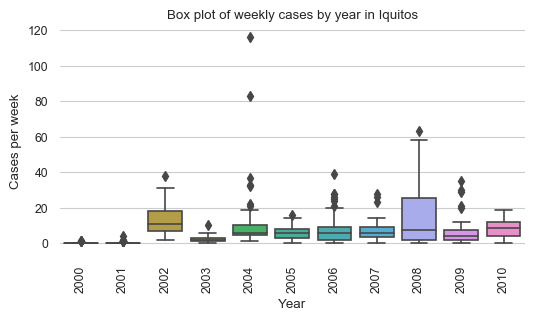

In [52]:
# Graph box plot of weekly cases by year

g = plt.figure(figsize=(6, 3), dpi=100)
g = sns.boxplot(data=df, y='total_cases', x='year')
g = plt.xlabel('Year')
g = plt.ylabel('Cases per week')
g = plt.title('Box plot of weekly cases by year in {}'.format(CITY))
g = plt.xticks(rotation=90)
g = plt.box(on=None)

### Explore weekly cases across all months  -  Iquitos

In [53]:
# Calc basic descritive stats of weekly cases across months

df_monthly = df.copy().pivot(columns='month', values='total_cases')
df_monthly.columns = month_names_short
df_monthly.describe()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,50.0000,40.000000,40.000000,50.000000,40.000000,40.00000,50.000000,40.000000,43.000000,47.000000,40.000000,40.000000
mean,12.0800,12.575000,7.250000,5.700000,4.850000,3.37500,3.060000,3.150000,6.441860,9.744681,9.825000,12.900000
std,12.2255,10.497588,5.754597,4.713203,4.532221,3.20006,2.923585,2.732051,9.300032,14.380645,10.307795,22.834746
min,0.0000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.2500,4.500000,3.000000,1.250000,1.000000,1.00000,0.250000,0.000000,0.000000,1.000000,2.000000,1.000000
50%,9.0000,11.000000,7.000000,5.000000,5.000000,3.00000,2.500000,3.500000,2.000000,3.000000,5.500000,4.500000
75%,16.0000,20.000000,9.250000,8.750000,7.000000,4.25000,5.000000,5.000000,8.500000,11.000000,14.500000,12.000000
max,58.0000,39.000000,26.000000,18.000000,22.000000,13.00000,12.000000,9.000000,45.000000,63.000000,37.000000,116.000000


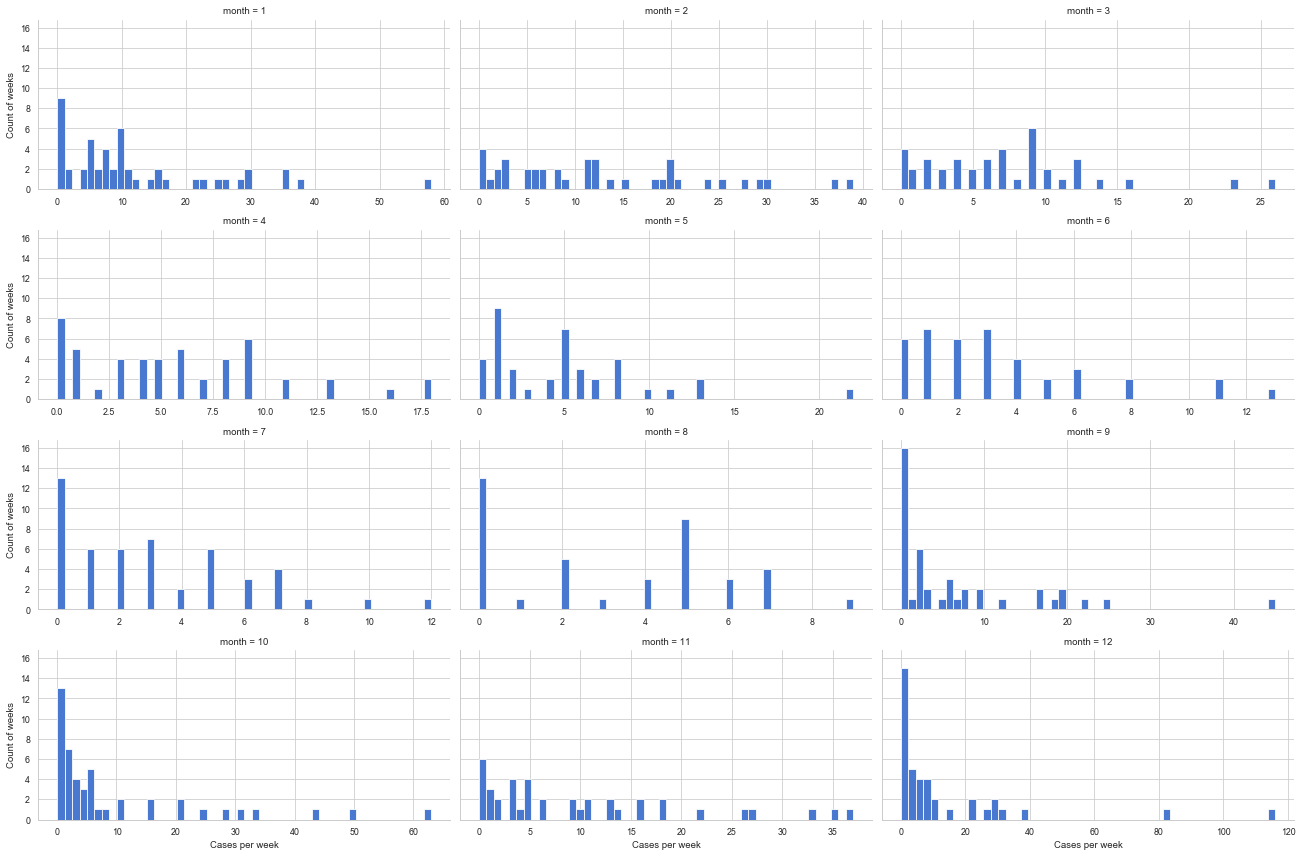

In [54]:
# Graph grid chart of histogram of cases by month

g = sns.FacetGrid(data = df_temp, col='month', col_wrap=3, sharex=False, aspect=2)
g = g.map(plt.hist, 'total_cases', bins=50)
g = g.set_axis_labels('Cases per week', 'Count of weeks')

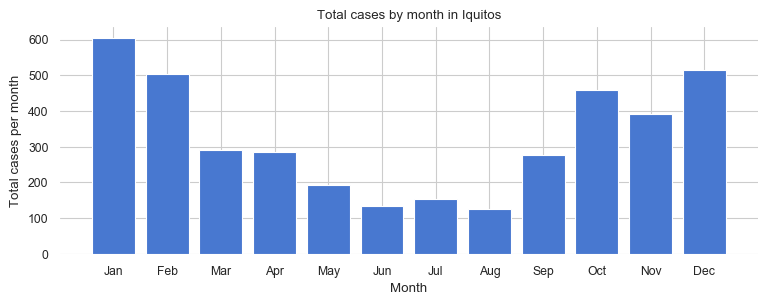

In [55]:
# Graph barplot of total monthly cases

df_monthly_sum = pd.DataFrame(df_monthly.sum())
df_monthly_sum.reset_index(inplace=True)

g = plt.figure(figsize=(9, 3), dpi=100)
g = plt.bar(df_monthly_sum.iloc[:, 0], df_monthly_sum.iloc[:, 1], align='center')
g = plt.xlabel('Month')
g = plt.ylabel('Total cases per month')
g = plt.title('Total cases by month in {}'.format(CITY))
# g = plt.xticks(np.arange(min(df_monthly_sum.iloc[:, 0]), max(df_monthly_sum.iloc[:, 0])+1, 2))
g = plt.box(on=None)

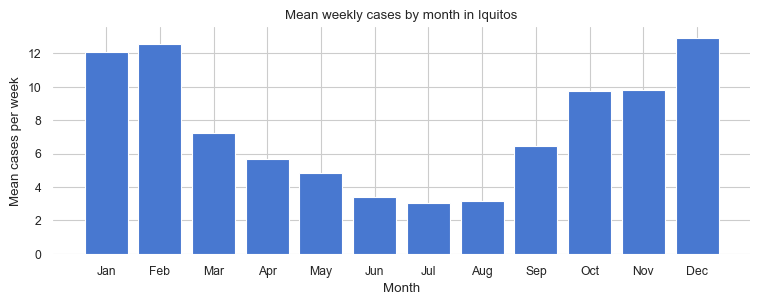

In [56]:
# Graph barplot of average cases by month

df_monthly_mean = pd.DataFrame(df_monthly.mean())
df_monthly_mean.reset_index(inplace=True)

g = plt.figure(figsize=(9, 3), dpi=100)
g = plt.bar(df_monthly_mean.iloc[:, 0], df_monthly_mean.iloc[:, 1], align='center')
g = plt.xlabel('Month')
g = plt.ylabel('Mean cases per week')
g = plt.title('Mean weekly cases by month in {}'.format(CITY))
g = plt.box(on=None)

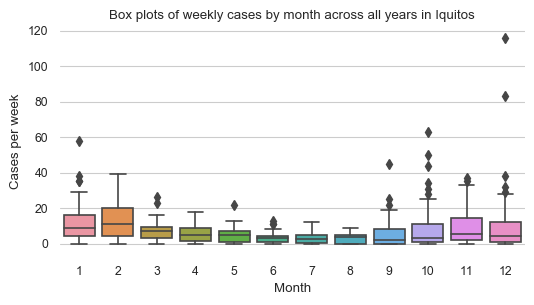

In [57]:
# Graph box plot of weekly cases across months

g = plt.figure(figsize=(6, 3), dpi=100)
g = sns.boxplot(data=df, y='total_cases', x='month')
g = plt.xlabel('Month')
g = plt.ylabel('Cases per week')
g = plt.title('Box plots of weekly cases by month across all years in {}'.format(CITY))
g = plt.box(on=None)

### Decompose weekly cases into trend, seasonality and residual  -  Iquitos

In [58]:
# Drop columns that aren't neeeded

df_decomp = df.drop(['year', 'month', 'weekofyear'], axis=1)

# # Check
# df_decomp
# df_decomp.info()

Decomposition of weekly cases into trend, seasonality and residual via a naive, additive model in Iquitos


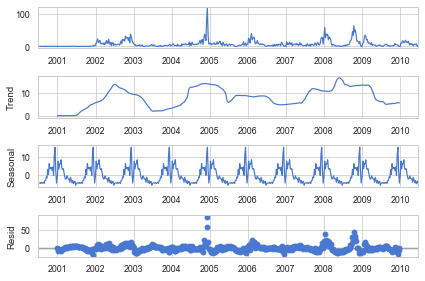

In [59]:
# Calc via statsmodels tsa's seasonal_decompose()

print('Decomposition of weekly cases into trend, seasonality and residual via a naive, additive model in {}'.format(CITY))
decompose = seasonal_decompose(df_decomp, model='additive', period=52)
g = decompose.plot()
g = plt.show()

## Commentary

Here are my takeaways from this exploratory analysis on the forecast variable of weekly cases in two cities of San Juan and Iquitos. 

NOTE:  I treat the data from these two cities independently. This is because the two cities are more than 1,500 miles apart and in two different counties. They don't share insect populations. Most likely, they don't share human or insect populations.  They don't share climates.  They don't share medical systems.

### Weekly cases in San Juan, Puerto Rico

First, I look at the largest sample, which is from San Juan, Puerto Rico.

**Sample size, count and variance of weekly cases**:  

* The San Juan sample includes 936 observations of weekly cases over 17 full years and 2 partial years.  
* The mean is about 34 cases a week and the median is 19.  
* The standard deviation is relatively large at about 51 cases.

**Distribution of weekly cases**:  

* The distribution of weekly cases isn't normal.  There's a large, positive skew as most weeks have no or very few case and a few have 200+ cases.  This distribution looks "exponential." 
* After a log(x+1) transformation, the distribution a bit more normal but still includes its right skew.
* The distribution of the week over week difference in weekly cases looks most normal.

**Outliers**:  

* The box plot of weekly cases highlights that most weeks have few cases as the entire  interquartile range (IRQ) is less than 50.  At the same time, the plot shows that there are many outliers in excess of 1.5 IRQ.
* The goal of this exercise is to predict those peaks or spikes in cases, so outliers can't be ignored.
* (((Add a comment on box plot of transformed))

**Weekly cases across all years**:  

* A time plot of weekly cases corroborates the low baseline of cases per week plus the periodic spikes.
* These spikes also stand out when looking at rolling average of cases per week across various-sized windows.

**Weekly cases by each year**:  

* The mean weekly cases per year show the variance from year to year, ranging from a low of about 9 cases per week on average in 2002 to a maximum of about 126 in 1994.  

* This variance is further highlight when looking at time plots by individual years.  Using the 6 years from 1993 to 1998 as a sample, 4 years (i.e., 1993, 1995, 1996 and 1997) have relatively flat cases per week for the entire year, but 2 years (i.e., 1994 and 1995) have large spikes in cases.

* Box plots of individual years further call out the years challenged by the disease (i.e., 1991, 1994, 1998, 2005 and 2007) and those relatively disease free.

**Weekly cases by month**:  

* Looking at cases across months (e.g., looking at all Januaries or Februaries) starts to show the seasonal patterns of dengue fever.

* The distribution of weekly cases by month typically follows the positive-skewed, long-tailed, "exponential" shaped pattern (e.g, as seen in July, August and September), but in some months, weekly cases has a more even, more "flat" distribution (e.g., April and May).

* Looking at the average cases by month shows the peak in November at 71 weekly cases and the nadir in May at 11 weekly cases. 

* This pattern confirmed in the box plot.  There is fever period from August through December.  This period has higher mean weekly cases, wider IRQ, and numerous spikes.  There's non-fever period from February to June.  This period has far fewer cases, narrow IRQ and no spikes.

**Trend, seasonality and residual**:  

* Next, I use statsmodels seasonal decompose to visualize trend, seasonality and residuals.  I use a additive model as I don't see any pattern in the magnitude of the the seasonal variations varying with time.  Also, I'm using this naive model as more robust methods (such as SLT (Seasonal and trend decomposition using Loess) aren't readily importable in the current version of Pandas).

* There doesn't appear to be a strong trend.  There are larger "humps" (corresponding to the worse years of 1994 and 1998) and smaller ones (corresponding to the bad years of 1991, 2004 and 2005).  Overall, there's slight downward trend.

* There is strong seasonality with a 1-year period. 

* The residuals indicate that this naive additive model, most likely, isn't capturing all the information in the data.  For example, the residual doesn't appear quite random; it doesn't appear to have a mean of zero; and it doesn't appear to have a constant variance (i.e., the "spikes" have much larger variance).

### Weekly cases in Iquitos, Peru

Next, I do the same exploration of my sample from Iquitos, Peru.  My focus is, how does this sample differ from the San Juan sample?

**Sample size, count and variance of weekly cases**:  

* The Iquitos sample is roughly 1/2 the size of the San Juan sample.  Iquitos includes 520 weekly observations across 9 full years and 2 partial years.  
* The Iquitos mean weekly cases is much smaller than San Juan's--about 8 cases in Iquitos as compared to San Juan's 34.  
* Like San Juan, Iquitos' standard deviation is relatively large to the mean at about 11 cases a week.

**Distribution**: 

* The distribution of weekly cases in Iquitos has a similar "exponential" shape to that of San Juan, looks a bit more normal after a log transformation, and looks very normal once it has been differenced.

**Outliers**: 

* In Iquitos, there is a similar patterns to San Juan of narrow IRQ with many outliers.

**Weekly cases across all years**: 

* In Iquitos, there's a basic pattern similar to San Juan--years of few cases with "spike" years of high cases.  However, the size of the Iquitos spikes are much smaller than those of San Juan. 

* In Iquitos, there are two years--2000 and 2001--with almost no cases. However, I wonder if the few cases in those years are a function of something other than dengue fever, given how consistently low those years measure and how cleanly the data breaks to the more regular pattern with the start of the 2002 calendar year.  Maybe cases were measured differently in 2001 and 2002?

**Weekly cases by each year**: 

* The box plot of Iquitos cases by year shows the relative similarity of the various years, with the exception of of 2002, 2004 and 2008.

**Weekly cases by month**: 

* Iquitos' seasonality seems a bit different than that of San Juan. Specifically, Iquitos' cases are shifted about two months later in the calendar year. Iquitos high-fever season starts in October, peaks across December, January and February, and declines in March.

**Trend, seasonality and residual**: 

* I show the components of a naive, additive time-series model for Iquitos.

* Iquitos has a meandering trend with "humps" around the spikes of cases, much like San Juan.  However, Iquitos' trend appears to be more flat than San Juan's slight downward trend

* Iquitos has a different seasonality.  Rather than San Juan's gradual rise, peak and decline, Iquitos' seasonality looks more "spiky," with a small peak during the rise, a maximum a bit later, and a third smaller peak during the decline.